### Data Experiment

In this notebook I will analyse and experiment on the <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database.</a> It is Kaggle's 2nd most voted dataset. I did my first capstone on Fifa18 players dataset which contains 17000+ players data, it has more than 70 columns for players' personal, performance and positional attributes. The European soccer database is available in SQLlite database format and its tables are interrelated. I converted the tables into csv files. The database contains 11000 players playing in major European leagues, 25000 matches played in 8 seasons and many more.    
<img src="https://drive.google.com/uc?export=view&id=12qqmiJDk1shpnUWFa1nEO5MVJ_2YgHVx" width="500"/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

I was successful in converting all those tables into csv files except missing column headers. Next I will load each table into pandas dataframe with specified column headers because the csv files don't have them.

**Player**

In [2]:
# read data
players = pd.read_csv("../../../Data & Script/ESD/player.csv", names = ["id", "player_api_id", "player_name", "player_fifa_api_id", "birthday", "height","weight"], index_col="id")
# show sample data
players.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
3538,429847,Frank Adu Kwame,213014,1985-05-16 00:00:00,180.34,174
10979,161291,Youssef El Arabi,194209,1987-02-03 00:00:00,182.88,185
8218,692984,Ousmane Dembele,231443,1997-05-15 00:00:00,177.80,134
10321,42898,Timo Ochs,101482,1981-10-17 00:00:00,187.96,194
8838,570760,Reece Burke,221456,1996-09-02 00:00:00,187.96,179


**Player attributes**

It is hard to type the column names for table Player_Attributes so using Navicat I exported the table into a query file(.sql) and applied a regular expression to filter out the column names

In [3]:
# regex to filter attributes within quotes
def filter_columns(attribs):
    import re
    pattern = re.compile(r'\"(\w+?)\"')
    column_names = re.findall(pattern, attribs)
    return column_names

In [4]:
file = open("../../../Data & Script/ESD/Scripts/Player_Attributes.sql", "r")
pa_column_names = filter_columns(file.read())
print(pa_column_names)

['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [5]:
# load data
player_attributes = pd.read_csv("../../../Data & Script/ESD/player_attributes.csv", names = pa_column_names, index_col="id")
# show sample data
player_attributes.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
171687,148811,46067,2009-08-30 00:00:00,67.0,73.0,left,medium,medium,68.0,41.0,...,71.0,68.0,57.0,63.0,68.0,10.0,24.0,68.0,24.0,24.0
145438,26709,30740,2014-04-11 00:00:00,75.0,75.0,right,medium,high,59.0,41.0,...,75.0,65.0,75.0,74.0,73.0,15.0,10.0,9.0,7.0,12.0
74188,181458,163670,2011-08-30 00:00:00,77.0,84.0,right,medium,medium,78.0,81.0,...,75.0,69.0,36.0,54.0,45.0,6.0,7.0,10.0,9.0,6.0
139873,207902,179311,2014-02-21 00:00:00,57.0,61.0,right,medium,medium,51.0,58.0,...,52.0,65.0,32.0,32.0,37.0,13.0,9.0,11.0,9.0,8.0
98792,193376,308088,2007-02-22 00:00:00,59.0,62.0,left,None,1,49.0,35.0,...,46.0,38.0,52.0,62.0,59.0,13.0,9.0,10.0,9.0,14.0


**Team**

In [6]:
file = open("../../../Data & Script/ESD/Scripts/team.sql", "r")
t_column_names = filter_columns(file.read())
print(t_column_names)
# load data
team = pd.read_csv("../../../Data & Script/ESD/team.csv", names = t_column_names, index_col="id" )
# show sample data
team.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name']


,team_api_id,team_fifa_api_id,team_long_name,team_short_name
id,,,,
10312,4170,111376.0,US Boulogne Cote D'Opale,BOU
27780,10218,1971.0,Excelsior,EXC
19305,8460,10030.0,SC Paderborn 07,PAD
12587,9837,379.0,Stade de Reims,REI
39392,10251,81.0,Hibernian,HIB


**Team Attributes**

In [7]:
file = open("../../../Data & Script/ESD/Scripts/team_attributes.sql", "r")
ta_column_names = filter_columns(file.read())
print(ta_column_names)
# load data
team_attributes = pd.read_csv("../../../Data & Script/ESD/team_attributes.csv", names = ta_column_names, index_col="id" )
# show sample data
team_attributes.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass']


,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
id,,,,,,,,,,,,,,,,,,,,,
931,111540,2033,2013-09-20 00:00:00,45,Balanced,NaN,Little,52,Mixed,Organised,...,43,Normal,Free Form,37,Medium,31,Contain,44,Normal,Cover
1119,1819,9853,2010-02-22 00:00:00,65,Balanced,NaN,Little,65,Mixed,Organised,...,60,Normal,Organised,30,Deep,30,Contain,30,Narrow,Offside Trap
306,110915,9880,2015-09-10 00:00:00,66,Balanced,31.0,Little,41,Mixed,Organised,...,66,Normal,Organised,39,Medium,49,Press,57,Normal,Cover
270,1961,8344,2011-02-22 00:00:00,67,Fast,NaN,Little,49,Mixed,Organised,...,48,Normal,Organised,46,Medium,47,Press,53,Normal,Cover
417,1971,10218,2012-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,37,Normal,Organised,23,Deep,30,Contain,32,Narrow,Cover


**League**

In [8]:
file = open("../../../Data & Script/ESD/Scripts/league.sql", "r")
l_column_names = filter_columns(file.read())
print(l_column_names)
# load data
league = pd.read_csv("../../../Data & Script/ESD/league.csv", names = l_column_names,index_col="id" )
# show sample data
league.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

['id', 'country_id', 'name']


,country_id,name
id,,
21518,21518,Spain LIGA BBVA
1729,1729,England Premier League
7809,7809,Germany 1. Bundesliga
19694,19694,Scotland Premier League
1,1,Belgium Jupiler League


**Country**

In [9]:
# load data
country = pd.read_csv("../../../Data & Script/ESD/country.csv", names = ["id","name"], index_col="id" )
# show sample data
country.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

,name
id,
21518,Spain
1729,England
7809,Germany
19694,Scotland
1,Belgium


**Match**

In [10]:
file = open("../../../Data & Script/ESD/Scripts/match.sql", "r")
m_column_names = filter_columns(file.read())
print(m_column_names)
# load data
match = pd.read_csv("../../../Data & Script/ESD/match.csv", names = m_column_names,index_col="id" )
# show sample data
match.sample(n=5, frac=None, replace=False, weights=None, random_state=25, axis=None)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,,,,,,,,,,,,,,,,,,,,,
7386,4769,4769,2014/2015,5,2014-09-13 00:00:00,1709744,9837,9941,2,0,...,2.40,3.10,3.3,2.50,NaN,NaN,NaN,NaN,NaN,NaN
6217,4769,4769,2011/2012,37,2012-05-13 00:00:00,1020237,9831,4087,1,1,...,3.75,2.00,3.3,4.33,2.0,3.2,3.75,2.05,3.25,3.50
21587,21518,21518,2008/2009,15,2008-12-14 00:00:00,530352,9864,8388,2,0,...,4.00,1.85,3.4,4.00,1.9,3.4,4.00,1.83,3.30,4.33
14155,13274,13274,2010/2011,5,2010-09-11 00:00:00,836205,10229,9803,1,2,...,6.25,1.57,3.8,5.50,1.6,3.6,5.00,1.62,3.60,5.40
16535,15722,15722,2011/2012,2,2011-08-06 00:00:00,1030825,2183,10265,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Analysis that highlights your experimental hypothesis.
- A rollout plan showing how you would implement and rollout the experiment
- An evaluation plan showing what constitutes success in this experiment

**Analysis of Proposed Experiement**

A match with many goals involved is entertaining and attracts more audience and business. I want to statisically prove that many goals are scored in the English Premier League per match than any other league. 

**Rollout PLan**

The population constitues all matches that were played in Europe major leagues. The experiment is carried out on games played in 8 seasons from 2008/2009 up to 2015/16. There are  approximately 3000 * 8 games under this study but the sample size is not very big compared to the population size. I am studying only Germany, Italy, France and Spain. The rollout plan is as follows

- Divide the matches into 5 leagues
- Filter matches played in 2008/2009 season
- Sum up the home and away goals of each match in English Premier league
- Sum up the home and away goals of each match in each of the other leagues
- Perform an independent two samples ttest on English Premier league and each of the others.
- The TTest is one-tailed
- Obtain t_statistic and p_value for all comparisions ( 7 of them)
- See if I can reject the null hypothesis
- Do the above steps for each season

**Evaluation Plan**

Success metric is number of goals scored. I expect average goals scored per match in English Premeir league to be significantly greater than other leagues. The null hypothesis is the opposite of my expectation.

H <sub>0</sub>: ...

H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than other leagues"


H <sub>0</sub>: ...

H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than France League"


H <sub>0</sub>: ...

H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than Italy League(SeriaA)"


H <sub>0</sub>: ...

H <sub>A</sub>:Matches played in the English Premeir League have greater amount of goals than Germany League(Bundesliga)"


**Start the Experiement**

There are 8 leagues in the dataset and I need to compare the English premier league to the others

In [11]:
league.name

id
1          Belgium Jupiler League
1729       England Premier League
4769               France Ligue 1
7809        Germany 1. Bundesliga
10257               Italy Serie A
13274      Netherlands Eredivisie
15722          Poland Ekstraklasa
17642    Portugal Liga ZON Sagres
19694     Scotland Premier League
21518             Spain LIGA BBVA
24558    Switzerland Super League
Name: name, dtype: object

In [12]:
# only top leagues
top_leagues = np.array(league.index)
top_leagues = top_leagues[[1,2,3,4,9]]

In [13]:
matches_per_league = {}
# filter out  only the top leagues
for lid in top_leagues:
    # use the league title as a key, split removes everything from each league title except country name
    matches_per_league[league.loc[lid]['name'].split()[0]] = match[match['league_id'] == lid]

In [14]:
matches_per_league.keys()

dict_keys(['England', 'France', 'Germany', 'Italy', 'Spain'])

In [15]:
from scipy import stats
# create an empty dataframe with column headers
data = pd.DataFrame(columns = ["season", "league", "tvalue", "pvalue"])
# for each season
for season in match.season.unique():
    print("\nSeason: ",season,"\n") 
    # compare the rest with English Premeir League matches
    england_matches = matches_per_league['England']
    england_matches = england_matches[england_matches['season'] == season]
    england_goals = england_matches['home_team_goal']   + england_matches['away_team_goal']
    # iterate over other leagues
    for league in list(matches_per_league.keys())[1:]:
        matches = matches_per_league[league]
        matches = matches[matches['season'] == season]
        goals = matches['home_team_goal'] + matches['away_team_goal']
        tvalue, pvalue = stats.ttest_ind(england_goals, goals)
        # pvalue should be divided by two since it is a one tailed t-test
        data = data.append({'season': season, 'league':league, 'tvalue':tvalue, 'pvalue':pvalue/2},ignore_index=True)
        print("England Vs. ", league,"\n" ,pvalue)


Season:  2008/2009 

England Vs.  France 
 0.04500935153835935
England Vs.  Germany 
 0.000409469845435328
England Vs.  Italy 
 0.29327127316223245
England Vs.  Spain 
 0.000710410444703151

Season:  2009/2010 

England Vs.  France 
 0.003009140419373545
England Vs.  Germany 
 0.6625448056736762
England Vs.  Italy 
 0.19006557826930007
England Vs.  Spain 
 0.6399819089328177

Season:  2010/2011 

England Vs.  France 
 5.624334079856608e-05
England Vs.  Germany 
 0.3273419220313446
England Vs.  Italy 
 0.016975985983897178
England Vs.  Spain 
 0.6457661417282421

Season:  2011/2012 

England Vs.  France 
 0.014461414886769117
England Vs.  Germany 
 0.6751520572451293
England Vs.  Italy 
 0.07871183524735605
England Vs.  Spain 
 0.7364397111982068

Season:  2012/2013 

England Vs.  France 
 0.03972166999742623
England Vs.  Germany 
 0.3083395909619763
England Vs.  Italy 
 0.20699065315363105
England Vs.  Spain 
 0.5679914427614969

Season:  2013/2014 

England Vs.  France 
 0.0076045391

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


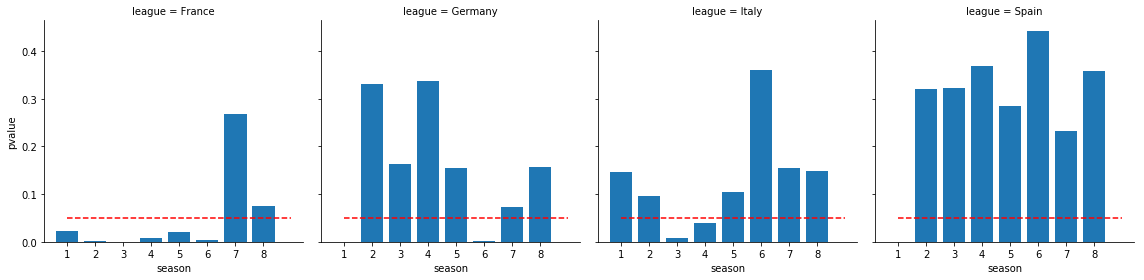

In [20]:
myPlot = sns.FacetGrid(col='league', data=data, size=4)
myPlot = myPlot.map(plt.bar, "season", "pvalue")
myPlot.set_xticklabels(range(1,9))
# (x1, x2), (y1,y2)
myPlot.axes[0,0].plot((0, 8), (0.05, 0.05), 'r--')
myPlot.axes[0,1].plot((0, 8), (0.05, 0.05), 'r--')
myPlot.axes[0,2].plot((0, 8), (0.05, 0.05), 'r--')
myPlot.axes[0,3].plot((0, 8), (0.05, 0.05), 'r--')

England vs Germany, England vs Italy and England vs Spain most are above 0.05. Therefore the visual can show that I may fail to reject the null hypothesis for the three. The null hypothesis for England vs Spain is most likely to be accepted because the points are well above the red-line. Almost all of the pvalues are below 0.05 for Engalnd vs France so it is most likely that the null hypothesis for it will be rejected.

To be sure I will calculate one pvalue for all matches played in France league and England league

**Engalnd vs. France**

In [ ]:
france_goals = matches_per_league['France'].home_team_goal + matches_per_league['France'].away_team_goal
england_goals = matches_per_league['England'].home_team_goal + matches_per_league['England'].away_team_goal

tvalue, pvalue = stats.ttest_ind(france_goals, england_goals)
print("pvalue = ", pvalue/2)

Now I can surely reject the null hypothesis which says

"Matches played in the English Premeir League have lesser or equal amount of goals than France League"

Next I will check the pvalue of  a two sample t-test between England league and the other three(Germany, Italy, Spain)

**England vs. Italy**

In [ ]:
italy_goals = matches_per_league['Italy'].home_team_goal + matches_per_league['Italy'].away_team_goal

tvalue, pvalue = stats.ttest_ind(italy_goals, england_goals)

print("pvalue = ", pvalue/2)


**England vs. Germany**

In [ ]:

germany_goals = matches_per_league['Germany'].home_team_goal + matches_per_league['Germany'].away_team_goal

tvalue, pvalue = stats.ttest_ind(germany_goals, england_goals)

print("pvalue = ", pvalue/2)

**England vs. Spain**

In [ ]:
spain_goals = matches_per_league['Spain'].home_team_goal + matches_per_league['Spain'].away_team_goal

tvalue, pvalue = stats.ttest_ind(spain_goals, england_goals)

print("pvalue = ", pvalue/2)

**England vs. other leagues**

In [ ]:
match_others = match[match['league_id'].isin([1729, 4769,7809,10257,21518])]

other_goals = match_others.home_team_goal + match_others.away_team_goal

tvalue, pvalue = stats.ttest_ind(other_goals, england_goals)

print("pvalue = ", pvalue/2)

- <p style="color:red"> H <sub>0</sub>: **Matches played in the English Premeir League have same or less amount of goals than France League"</p>

- H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than France League"


- <p style="color:red"> H <sub>0</sub>: **Matches played in the English Premeir League have same or less amount of goals than Germany League(Bundesliga)"</p>

- H <sub>A</sub>:Matches played in the English Premeir League have greater amount of goals than Germany League(Bundesliga)"


- <p style="color:red">H <sub>0</sub>: **Matches played in the English Premeir League have same or less amount of goals than Italy League(SeriaA)"</p>

- H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than Italy League(SeriaA)"


- <p style="color:green">H <sub>0</sub>: --Matches played in the English Premeir League have same or less amount of goals than Spain League(LaLiga)"</p>

- H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than Spain League(LaLiga)"


- <p style="color:green">H <sub>0</sub>: --Matches played in the English Premeir League have same or less amount of goals than other leagues"</p>

- H <sub>A</sub>: Matches played in the English Premeir League have greater amount of goals than other leagues"


All the red onces(**) are rejected null hypothesises whereas green ones(--) are not rejected
